<h1 style="text-align:left; padding: 10px; background-color: brown; border: 2px solid #ddd; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0,0,0,0.1); font-size: 30px; font-family: 'Georgia';">
    Project 01
</h1>


<h1 style="color: black; padding: 10px; background-color: lightblue; border: 2px solid purple; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0,0,0,0.1);
    font-family: 'Courier New', monospace; text-align: center; font-size: 38px; text-shadow: 0 0 5px #0ff, 0 0 10px #0ff, 0 0 20px #0ff;">
    Zomato Data Analysis
</h1>


<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 255, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 22px; font-family: 'Georgia'; font-weight: normal;" >
Step 1: Import Libraries
</div>


In [4]:
import numpy as np  # Numerical Operations
import pandas as pd  # data manipulation & Analysis
import matplotlib.pyplot as plt # data Visualization
import seaborn as sns # data Visualization

<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 255, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 22px; font-family: 'Georgia'; font-weight: normal;" >
Step 2: Create Dataframe
</div>

In [6]:
dataframe = pd.read_csv("Zomato data .csv")

In [7]:
dataframe.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 255, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 22px; font-family: 'Georgia'; font-weight: normal;" >
Step 3: Convert the data type of column - rate
</div>

In [9]:
def handleRate(value):
    value = str(value).split("/")
    value = value[0];
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)

In [10]:
dataframe.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [12]:
dataframe.describe().round(1)

,rate,votes,approx_cost(for two people)
count,148.0,148.0,148.0
mean,3.6,264.8,418.2
std,0.4,653.7,223.1
min,2.6,0.0,100.0
25%,3.3,6.8,200.0
50%,3.7,43.5,400.0
75%,3.9,221.8,600.0
max,4.6,4884.0,950.0


<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 255, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 20px; font-family: 'Georgia'; font-weight: normal;" >
Q 1: Majority of customers order from which type of Resturant - Plot
</div>

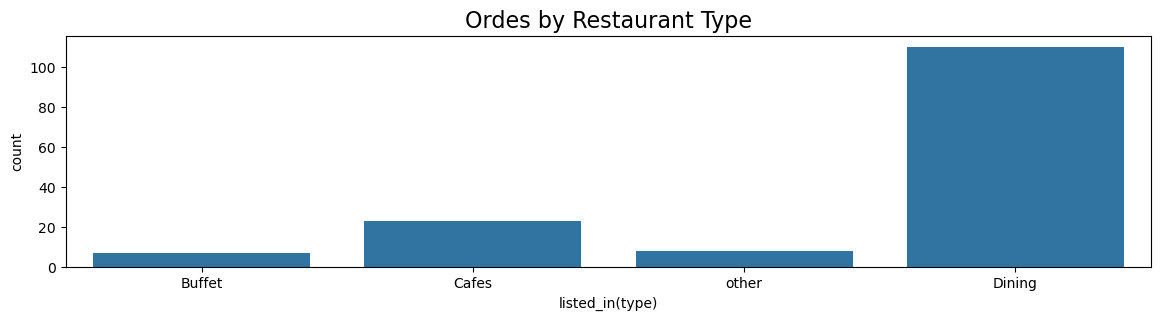

In [91]:
plt.figure(figsize=(14, 3))
sns.countplot(x = dataframe["listed_in(type)"])

plt.title("Ordes by Restaurant Type", fontsize=16)
plt.show()

<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 5, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 20px; font-family: 'Georgia'; font-weight: normal;" >
Conclusion: Majority of resturant falls in Dinning Category. <br>
Dinning resturants are preferred by a large numbers of individuals.
</div>

<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 255, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 20px; font-family: 'Georgia'; font-weight: normal;" >
Q 2: How many vote recvied from the customers by which type of Resturant
</div>

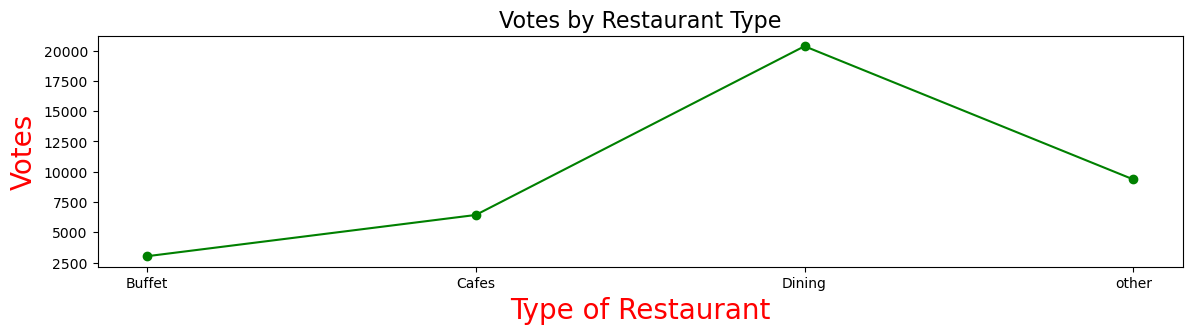

In [89]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

plt.figure(figsize=(14, 3))
plt.plot(result.index, result['votes'], color="green", marker='o') 

plt.xlabel("Type of Restaurant", color="red", fontsize=20)
plt.ylabel("Votes", color="red", fontsize=20)
plt.title("Votes by Restaurant Type", fontsize=16)

plt.show()

<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 5, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 20px; font-family: 'Georgia'; font-weight: normal;" >
Conclusion:
Dinning resturants has recevied maximum votes
</div>

<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 255, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 20px; font-family: 'Georgia'; font-weight: normal;" >
Q 3: What are the rating that the majority of restaurants have received?
</div>

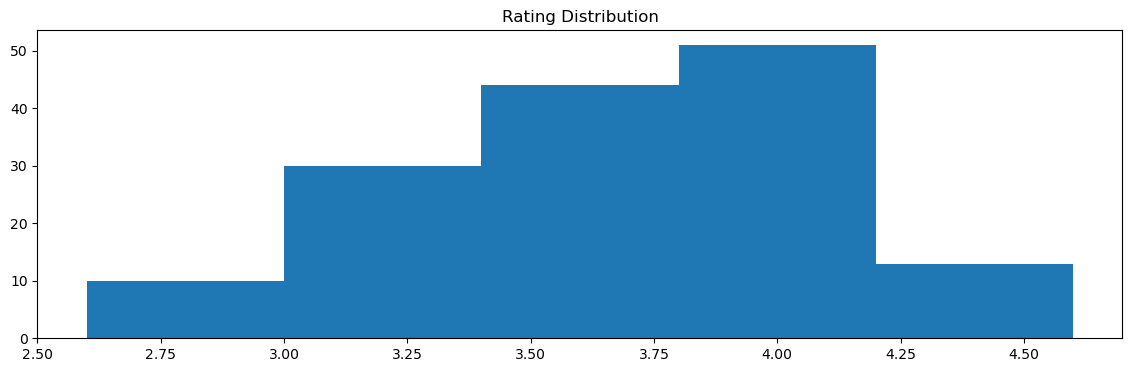

In [97]:
plt.figure(figsize=(14, 4))
plt.hist(dataframe['rate'], bins=5)
plt.title("Rating Distribution")
plt.show()

<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 5, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 20px; font-family: 'Georgia'; font-weight: normal;" >
Conclusion:
Majority resturants recevied maximum rating from 3.5 to 4.
</div>

<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 255, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 20px; font-family: 'Georgia'; font-weight: normal;" >
Q 4: Zomato has observed that most couples order most of their food online. What is the average spending on each order?
</div>

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

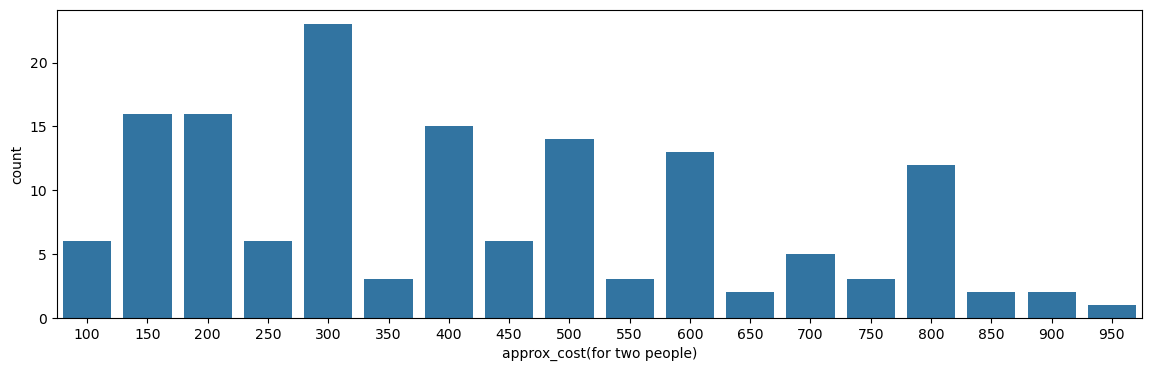

In [85]:
plt.figure(figsize=(14, 4))
couple_data = dataframe["approx_cost(for two people)"]
sns.countplot(x=couple_data)

<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 5, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 20px; font-family: 'Georgia'; font-weight: normal;" >
Conclusion:
The majority of couples preferr restaurants with an approximate cost of 300 rupess
</div>

<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 255, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 20px; font-family: 'Georgia'; font-weight: normal;" >
Q 5: Which mode (online or offline) has received the maximum rating?
</div>

<Axes: xlabel='online_order', ylabel='rate'>

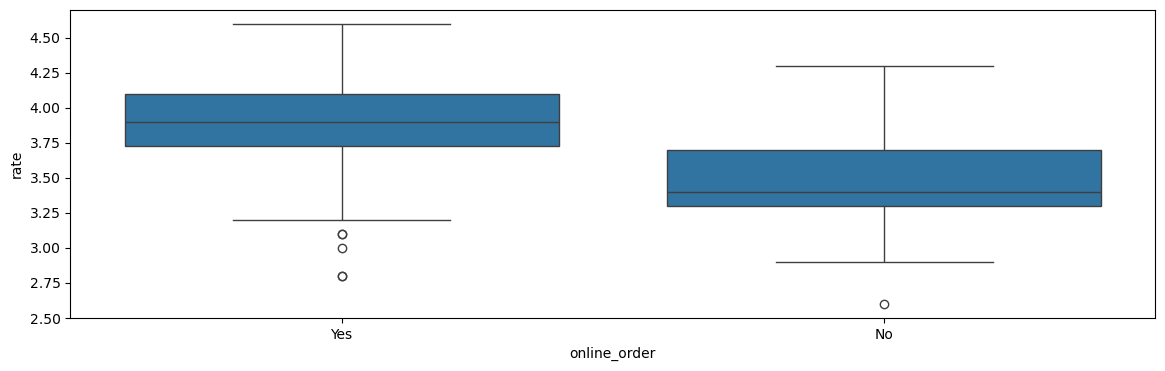

In [102]:
plt.figure(figsize = (14, 4))
sns.boxplot(x = 'online_order', y='rate', data= dataframe)

<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 5, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 20px; font-family: 'Georgia'; font-weight: normal;" >
Conclusion:
Offline order recevied lower rating in comparison to online order.
</div>

<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 255, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 20px; font-family: 'Georgia'; font-weight: normal;" >
Q 6: Which type of restaurant received more offline orders, so that Zomato can provide customers with some good offers?
</div>

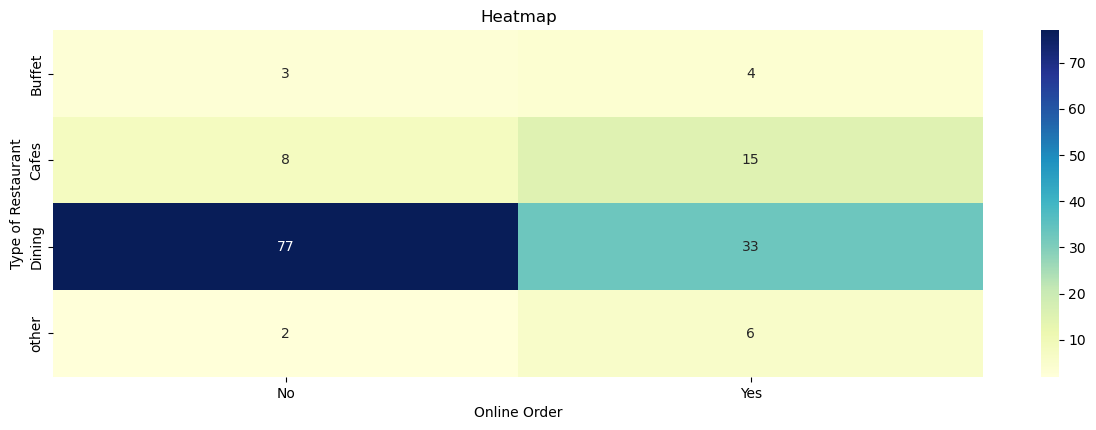

In [124]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

plt.figure(figsize=(15, 4.5))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')

plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Type of Restaurant")
plt.show()


<div style="text-align:left; backdrop-filter: blur(12px); background-color: rgba(255, 5, 255, 0.2); border-radius: 8px; padding: 6px; border: 2px solid lightgreen; color: white; font-size: 20px; font-family: 'Georgia'; font-weight: normal;" >
Conclusion:
Dinning resturants primarily accept offline orders, whereas cafes primarily receive online orders. <br> This Suggests tat clients prefered orders in person at restaurants, but prefer online ordering at cafes.
</div>

<h1 style="color: black; padding: 10px; background-color: lightblue; border: 2px solid Purple; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0,0,0,0.1);
    font-family: 'Georgia', monospace; text-align: left; font-size: 18px; font-weight: bold; ">
   Author : Junior Veer
</h1>

<h1 style="color: black; padding: 10px; background-color: lightblue; border: 2px solid Purple; border-radius: 8px; box-shadow: 2px 2px 5px rgba(0,0,0,0.1);
    font-family: 'Georgia', monospace; text-align: center; font-size: 18px; font-weight: bold; ">
   End of Project.
</h1>